In [4]:
___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

SyntaxError: invalid syntax (<ipython-input-4-60112e608cb0>, line 3)

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using algorithms ***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
pd.set_option('display.max_columns', 50)

In [6]:
import numpy as np

In [7]:
df = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [8]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [10]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [11]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

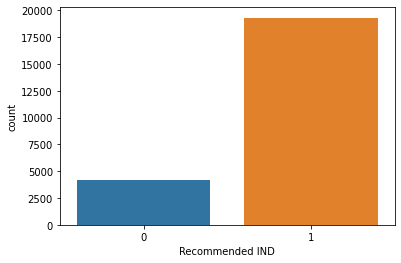

In [12]:
sns.countplot(data=df, x='Recommended IND')

### Data Wrangling
Take info

<AxesSubplot:xlabel='Rating', ylabel='count'>

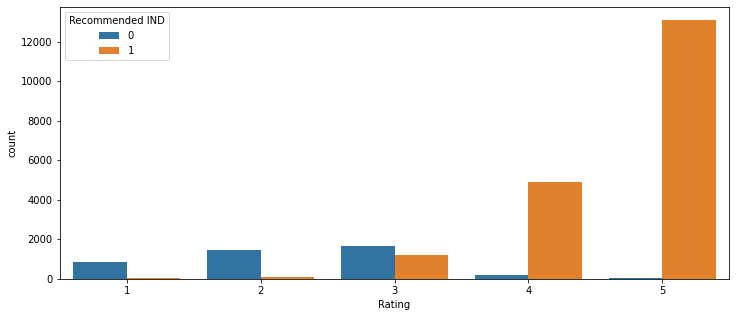

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Rating', hue=df['Recommended IND'])

In [14]:
df['Recommended IND'].nunique()

2

In [15]:
df = df[~((df.Rating == 3) & (df['Recommended IND']==1))]

<AxesSubplot:xlabel='Rating', ylabel='count'>

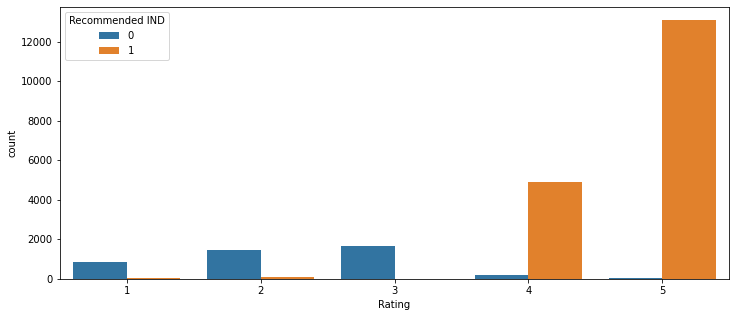

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Rating', hue=df['Recommended IND'])

In [17]:
df['Review Text']

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
                               ...                        
23479    So i wasn't sure about ordering this skirt bec...
23480                                                  NaN
23481    I was very happy to snag this dress at such a ...
23483    This fit well, but the top was very see throug...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 22297, dtype: object

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

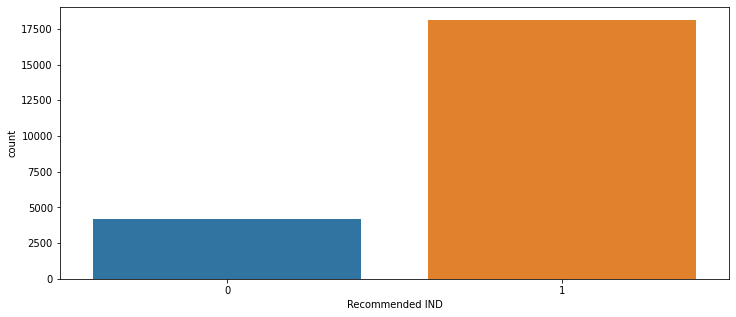

In [18]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Recommended IND')

---
---


## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [19]:
df2 = df.copy()

In [20]:
df2= df2[["Review Text", "Recommended IND"]]
df2.columns =['sentences', 'label']

In [21]:
df2.head()

,sentences,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


### Missing Value Detection

In [22]:
df2.isnull().sum()

sentences    826
label          0
dtype: int64

In [23]:
df2.dropna(inplace=True)

In [24]:
df2.isnull().sum()

sentences    0
label        0
dtype: int64

In [25]:
df2.shape

(21471, 2)

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization - Noise Removal - Lexicon Normalization

In [26]:
def cleaning(data):
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    #joining
    return " ".join(text_cleaned)

In [27]:
stop_words = stopwords.words('english')

In [28]:
df2['sentences'] = df2['sentences'].apply(cleaning)
df2['sentences']

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
2        high hope dress really wanted work initially o...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
                               ...                        
23478    surprised positive review product terrible cut...
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23483    fit well top see never would worked im glad ab...
23485    dress lovely platinum feminine fit perfectly e...
Name: sentences, Length: 21471, dtype: object

In [29]:
rare_words = pd.Series(" ".join(df2["sentences"]).split()).value_counts()
rare_words

dress          10696
fit             9613
size            8802
love            8690
top             7785
               ...  
intracately        1
perso              1
peple              1
applies            1
revery             1
Length: 11713, dtype: int64

In [30]:
rare_words = rare_words[rare_words <= 2]
rare_words

exaggerates    2
nandita        2
sassiness      2
librarian      2
cinnamon       2
              ..
intracately    1
perso          1
peple          1
applies        1
revery         1
Length: 6365, dtype: int64

In [31]:
rare_words.index

Index(['exaggerates', 'nandita', 'sassiness', 'librarian', 'cinnamon',
       'soaking', 'colorfast', 'stamped', 'spirit', 'fighting',
       ...
       'forarms', 'demosilles', 'yankee', 'dubious', 'dansko', 'intracately',
       'perso', 'peple', 'applies', 'revery'],
      dtype='object', length=6365)

In [32]:
df2["sentences"] = df2["sentences"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df2["sentences"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: sentences, dtype: object

---
---


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [33]:
tweets0 = df2[df2['label']==0]['sentences']

In [34]:
tweets0

2        high hope dress really wanted work initially o...
5        love tracy reese dress one petite foot tall us...
10       dress run small esp zipper area run ordered sp...
22       first pullover styling side zipper wouldnt pur...
25       loved material didnt really look long dress pu...
                               ...                        
23449    tried color really pretty fun want pair pant l...
23450    wanted love jacket soft great color unfortunat...
23460    purchased good price typically love maeve fabr...
23478    surprised positive review product terrible cut...
23483    fit well top see never would worked im glad ab...
Name: sentences, Length: 4101, dtype: object

In [35]:
tweets1 = df2[df2['label']==1]['sentences']

In [36]:
tweets1

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        basket hte last see would look like person sto...
                               ...                        
23476    bottom cute defiantly cheeky would recommend s...
23477    im impressed beautiful color combination embro...
23479    wasnt sure ordering skirt couldnt see person f...
23481    happy snag dress great price easy slip flatter...
23485    dress lovely feminine fit perfectly easy wear ...
Name: sentences, Length: 17370, dtype: object

### Collect Words (positive and negative separately)

In [37]:
neg_words = " ".join(tweets0)

In [38]:
pos_words = " ".join(tweets1)

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [39]:
from wordcloud import WordCloud

In [40]:
word_cloud_neg = WordCloud(background_color="white", max_words =250)

In [41]:
word_cloud_neg.generate(neg_words)

In [42]:
word_cloud_pos = WordCloud(background_color="white", max_words =250)

In [43]:
word_cloud_pos.generate(pos_words)

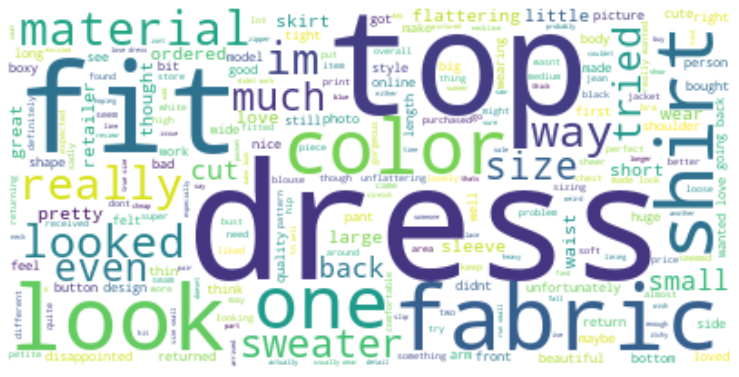

In [44]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(word_cloud_neg, interpolation="bilinear",)
plt.axis("off")
plt.show()

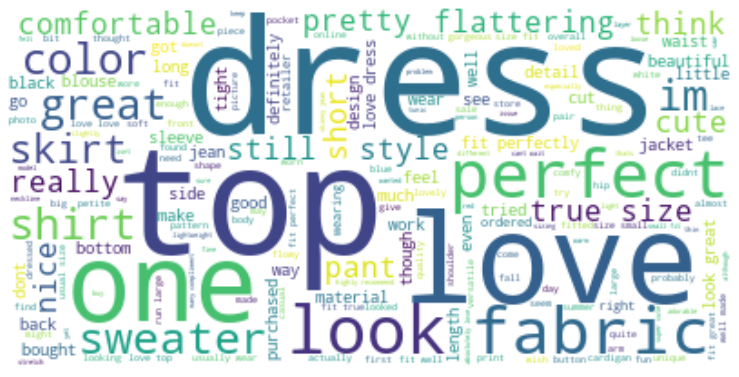

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(word_cloud_pos, interpolation="bilinear",)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [46]:
X = df2['sentences']
y = df2['label']

In [47]:
X.shape

(21471,)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Vectorization

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

### TF-IDF

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [53]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [54]:
def eval(model, X_test):
    preds = model.predict(X_test)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,X_test, y_test)

In [55]:
from sklearn.metrics import plot_confusion_matrix,classification_report

###  Logistic Regression

### Vec a)

In [56]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       820
           1       0.93      0.96      0.94      3475

    accuracy                           0.91      4295
   macro avg       0.86      0.82      0.84      4295
weighted avg       0.90      0.91      0.90      4295



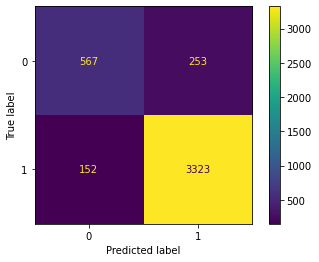

In [57]:
print("LOG MODEL")
eval(log, X_test_count)

In [60]:
from sklearn.model_selection import cross_val_score

In [58]:
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, average='weighted', labels=[0]),
                 'recall-0': make_scorer(recall_score, average='weighted', labels = [0]),
                 'f1-0': make_scorer(f1_score, average='weighted', labels = [0]),
                 'precision-1': make_scorer(precision_score, average='weighted', labels=[1]),
                 'recall-1': make_scorer(recall_score, average='weighted', labels = [1]),
                 'f1-1': make_scorer(f1_score, average='weighted', labels = [1])
                 }

In [59]:
score_df = pd.DataFrame(columns = ['model', 'accuracy', 'precision-0', 'recall-0', 'f1-0', 'precision-1', 'recall-1', 'f1-1'])
score_df

,model,accuracy,precision-0,recall-0,f1-0,precision-1,recall-1,f1-1


In [61]:
def cv_on_models(model, X_train_cv, model_and_vector):
    score_dict = {'model': model_and_vector, 'accuracy': 0, 'precision-0':0, 'recall-0':0, 'f1-0':0, 'precision-1':0, 'recall-1':0, 'f1-1':0}
    # this dictionary is useing for storing each models scores in function.
    for i, j in custom_scorer.items():
        scores = cross_val_score(model, X_train_cv, y_train, cv = 10, scoring = j).mean()
        score_dict[i] = scores
        print(f" {i} score for {model_and_vector} : {scores}\n")
    global score_df # For modifying dataframe which is outside of function, we need to declare it is global
    score_df = score_df.append(score_dict, ignore_index=True) # we append dictionary to dataframe at the end of cv
    print(score_df)

In [62]:
cv_on_models(log, X_train_count, 'LogisticReg_countVect')

 accuracy score for LogisticReg_countVect : 0.8970077693244912

 precision-0 score for LogisticReg_countVect : 0.7657819914344234

 recall-0 score for LogisticReg_countVect : 0.665340277262955

 f1-0 score for LogisticReg_countVect : 0.7115152086331479

 precision-1 score for LogisticReg_countVect : 0.9233823744211233

 recall-1 score for LogisticReg_countVect : 0.9517093711639759

 f1-1 score for LogisticReg_countVect : 0.9373037580459217

                   model  accuracy  precision-0  recall-0      f1-0  \
0  LogisticReg_countVect  0.897008     0.765782   0.66534  0.711515   

   precision-1  recall-1      f1-1  
0     0.923382  0.951709  0.937304  


### Vec b) Logistic Regression - Balanced

In [63]:
from sklearn.linear_model import LogisticRegression
log_bal = LogisticRegression(max_iter=1000, class_weight='balanced')
log_bal.fit(X_train_count,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
              precision    recall  f1-score   support

           0       0.67      0.82      0.74       820
           1       0.95      0.91      0.93      3475

    accuracy                           0.89      4295
   macro avg       0.81      0.86      0.83      4295
weighted avg       0.90      0.89      0.89      4295



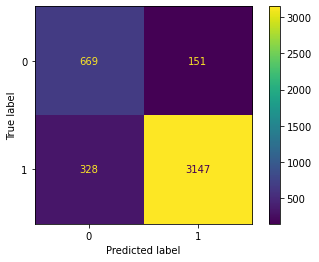

In [64]:
print("LOG MODEL BALANCED")
eval(log_bal, X_test_count)

In [65]:
cv_on_models(log_bal, X_train_count, 'LogisticReg_countVect')

 accuracy score for LogisticReg_countVect : 0.8828009367395685

 precision-0 score for LogisticReg_countVect : 0.6598954351398367

 recall-0 score for LogisticReg_countVect : 0.7985330639780563

 f1-0 score for LogisticReg_countVect : 0.722408875381864

 precision-1 score for LogisticReg_countVect : 0.9499820260339338

 recall-1 score for LogisticReg_countVect : 0.9026981783903331

 f1-1 score for LogisticReg_countVect : 0.9257106977769458

                   model  accuracy  precision-0  recall-0      f1-0  \
0  LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1  LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   

   precision-1  recall-1      f1-1  
0     0.923382  0.951709  0.937304  
1     0.949982  0.902698  0.925711  


##  Logistic Regression _ TF-IDF

In [66]:
from sklearn.linear_model import LogisticRegression
log_tfidf = LogisticRegression(max_iter=1000)
log_tfidf.fit(X_train_tf_idf,y_train)

LogisticRegression(max_iter=1000)

LOG MODEL
              precision    recall  f1-score   support

           0       0.84      0.61      0.71       820
           1       0.91      0.97      0.94      3475

    accuracy                           0.90      4295
   macro avg       0.88      0.79      0.82      4295
weighted avg       0.90      0.90      0.90      4295



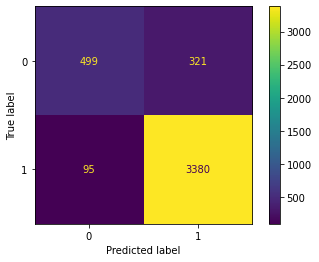

In [67]:
print("LOG MODEL")
eval(log_tfidf, X_test_tf_idf)

In [68]:
cv_on_models(log_tfidf, X_train_tf_idf, 'LogisticReg_tf_idf')

 accuracy score for LogisticReg_tf_idf : 0.8990458016561089

 precision-0 score for LogisticReg_tf_idf : 0.8381796010451319

 recall-0 score for LogisticReg_tf_idf : 0.5848747127288901

 f1-0 score for LogisticReg_tf_idf : 0.6884397631506369

 precision-1 score for LogisticReg_tf_idf : 0.9085449148798068

 recall-1 score for LogisticReg_tf_idf : 0.9732283460488628

 f1-1 score for LogisticReg_tf_idf : 0.939756090283851

                   model  accuracy  precision-0  recall-0      f1-0  \
0  LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1  LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2     LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   

   precision-1  recall-1      f1-1  
0     0.923382  0.951709  0.937304  
1     0.949982  0.902698  0.925711  
2     0.908545  0.973228  0.939756  


## Logistic Regression _ TF-IDF (Balanced)

In [69]:
log_tfidf_bal = LogisticRegression(max_iter=1000, class_weight="balanced")
log_tfidf_bal.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

LOG MODEL BALANCED
              precision    recall  f1-score   support

           0       0.94      0.21      0.35       820
           1       0.84      1.00      0.91      3475

    accuracy                           0.85      4295
   macro avg       0.89      0.60      0.63      4295
weighted avg       0.86      0.85      0.81      4295



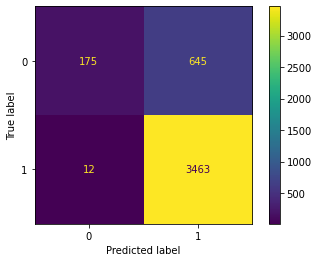

In [70]:
print("LOG MODEL BALANCED")
eval(log, X_test_tf_idf)

In [71]:
cv_on_models(log_tfidf_bal, X_train_tf_idf, 'LogisticReg_tf_idf_balanced')

 accuracy score for LogisticReg_tf_idf_balanced : 0.88192742166773

 precision-0 score for LogisticReg_tf_idf_balanced : 0.6431319821954398

 recall-0 score for LogisticReg_tf_idf_balanced : 0.8597977982059456

 f1-0 score for LogisticReg_tf_idf_balanced : 0.7356825500450566

 precision-1 score for LogisticReg_tf_idf_balanced : 0.9640467578138232

 recall-1 score for LogisticReg_tf_idf_balanced : 0.8871526536869855

 f1-1 score for LogisticReg_tf_idf_balanced : 0.9239766570851625

                         model  accuracy  precision-0  recall-0      f1-0  \
0        LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1        LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2           LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3  LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   

   precision-1  recall-1      f1-1  
0     0.923382  0.951709  0.937304  
1     0.949982  0.902698  0.925711  
2     0.908545  0

### Naive Bayes - Vec



In [72]:
from sklearn.naive_bayes import BernoulliNB # MultinomialNB() for multiclass model

In [73]:
nb = BernoulliNB()
nb.fit(X_train_count,y_train)

BernoulliNB()

NB MODEL
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       820
           1       0.94      0.93      0.93      3475

    accuracy                           0.89      4295
   macro avg       0.82      0.84      0.83      4295
weighted avg       0.90      0.89      0.89      4295



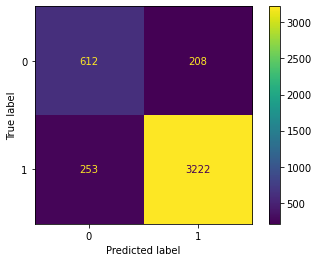

In [74]:
print("NB MODEL")
eval(nb, X_test_count)

In [75]:
cv_on_models(nb, X_train_count, 'NaiveBayes_CountVec')

 accuracy score for NaiveBayes_CountVec : 0.8912434919448939

 precision-0 score for NaiveBayes_CountVec : 0.6984011565403923

 recall-0 score for NaiveBayes_CountVec : 0.7595281340351396

 f1-0 score for NaiveBayes_CountVec : 0.7273790883228639

 precision-1 score for NaiveBayes_CountVec : 0.94204374035917

 recall-1 score for NaiveBayes_CountVec : 0.9223461835283393

 f1-1 score for NaiveBayes_CountVec : 0.9320633018605182

                         model  accuracy  precision-0  recall-0      f1-0  \
0        LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1        LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2           LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3  LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   
4          NaiveBayes_CountVec  0.891243     0.698401  0.759528  0.727379   

   precision-1  recall-1      f1-1  
0     0.923382  0.951709  0.937304  
1     0.949982  0.902698  0.92571

### Naive Bayes - Tf-idf

In [76]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train_tf_idf,y_train)

BernoulliNB()

NB MODEL
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       820
           1       0.94      0.93      0.93      3475

    accuracy                           0.89      4295
   macro avg       0.82      0.84      0.83      4295
weighted avg       0.90      0.89      0.89      4295



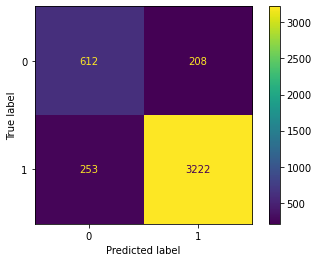

In [77]:
print("NB MODEL")
eval(nb, X_test_tf_idf)

In [78]:
cv_on_models(nb_tfidf, X_train_tf_idf, 'NaiveBayes_tf_idf')

 accuracy score for NaiveBayes_tf_idf : 0.8912434919448939

 precision-0 score for NaiveBayes_tf_idf : 0.6984011565403923

 recall-0 score for NaiveBayes_tf_idf : 0.7595281340351396

 f1-0 score for NaiveBayes_tf_idf : 0.7273790883228639

 precision-1 score for NaiveBayes_tf_idf : 0.94204374035917

 recall-1 score for NaiveBayes_tf_idf : 0.9223461835283393

 f1-1 score for NaiveBayes_tf_idf : 0.9320633018605182

                         model  accuracy  precision-0  recall-0      f1-0  \
0        LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1        LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2           LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3  LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   
4          NaiveBayes_CountVec  0.891243     0.698401  0.759528  0.727379   
5            NaiveBayes_tf_idf  0.891243     0.698401  0.759528  0.727379   

   precision-1  recall-1      f1-1  
0     0

### Support Vector Machine (SVM) - Vec

In [79]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.2)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.2)

SVC MODEL
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       820
           1       0.93      0.95      0.94      3475

    accuracy                           0.90      4295
   macro avg       0.84      0.82      0.83      4295
weighted avg       0.90      0.90      0.90      4295



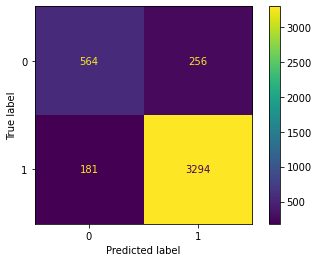

In [80]:
print("SVC MODEL")
eval(svc, X_test_count)

In [81]:
cv_on_models(svc, X_train_count, 'SVM_CountV')

 accuracy score for SVM_CountV : 0.8925834105700508

 precision-0 score for SVM_CountV : 0.7443179392648599

 recall-0 score for SVM_CountV : 0.6671686188746386

 f1-0 score for SVM_CountV : 0.7032075616223665

 precision-1 score for SVM_CountV : 0.9233443571137008

 recall-1 score for SVM_CountV : 0.9458082777838204

 f1-1 score for SVM_CountV : 0.9344157269996873

                         model  accuracy  precision-0  recall-0      f1-0  \
0        LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1        LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2           LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3  LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   
4          NaiveBayes_CountVec  0.891243     0.698401  0.759528  0.727379   
5            NaiveBayes_tf_idf  0.891243     0.698401  0.759528  0.727379   
6                   SVM_CountV  0.892583     0.744318  0.667169  0.703208   

   precision-1

### Support Vector Machine (SVM) - Tf-idf

In [82]:
from sklearn.svm import LinearSVC
svc_tfidf = LinearSVC()
svc_tfidf.fit(X_train_tf_idf,y_train)

LinearSVC()

SVC MODEL
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       820
           1       0.93      0.96      0.94      3475

    accuracy                           0.91      4295
   macro avg       0.86      0.82      0.84      4295
weighted avg       0.90      0.91      0.90      4295



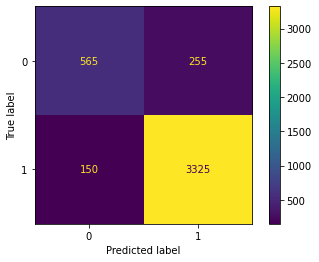

In [83]:
print("SVC MODEL")
eval(svc_tfidf, X_test_tf_idf)

In [84]:
cv_on_models(svc_tfidf, X_train_tf_idf, 'SVM_tf_idf')

 accuracy score for SVM_tf_idf : 0.89991850311512

 precision-0 score for SVM_tf_idf : 0.7753479301037985

 recall-0 score for SVM_tf_idf : 0.671433204833568

 f1-0 score for SVM_tf_idf : 0.7190893449471087

 precision-1 score for SVM_tf_idf : 0.9248482447379246

 recall-1 score for SVM_tf_idf : 0.9538685768447877

 f1-1 score for SVM_tf_idf : 0.9391019912786739

                         model  accuracy  precision-0  recall-0      f1-0  \
0        LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1        LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2           LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3  LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   
4          NaiveBayes_CountVec  0.891243     0.698401  0.759528  0.727379   
5            NaiveBayes_tf_idf  0.891243     0.698401  0.759528  0.727379   
6                   SVM_CountV  0.892583     0.744318  0.667169  0.703208   
7                 

### Random Forest - Vec

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(500, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

           0       0.90      0.37      0.52       820
           1       0.87      0.99      0.93      3475

    accuracy                           0.87      4295
   macro avg       0.88      0.68      0.72      4295
weighted avg       0.87      0.87      0.85      4295



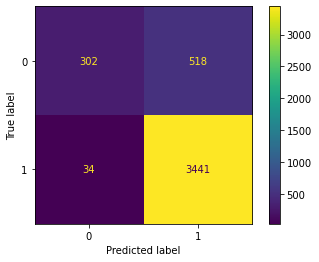

In [86]:
print("RF MODEL")
eval(rf, X_test_count)

In [87]:
cv_on_models(rf, X_train_count, 'RandomForest_CountVec')

 accuracy score for RandomForest_CountVec : 0.8664998647368675

 precision-0 score for RandomForest_CountVec : 0.8760261354595411

 recall-0 score for RandomForest_CountVec : 0.3514150418859812

 f1-0 score for RandomForest_CountVec : 0.5007195177381202

 precision-1 score for RandomForest_CountVec : 0.8658448933879749

 recall-1 score for RandomForest_CountVec : 0.9881255082327227

 f1-1 score for RandomForest_CountVec : 0.9229390267249988

                         model  accuracy  precision-0  recall-0      f1-0  \
0        LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1        LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2           LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3  LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   
4          NaiveBayes_CountVec  0.891243     0.698401  0.759528  0.727379   
5            NaiveBayes_tf_idf  0.891243     0.698401  0.759528  0.727379   
6              

## RandomForest - Tf-idf

In [88]:
rf_tfidf = RandomForestClassifier(500, random_state = 42, n_jobs = -1)
rf_tfidf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)

RF MODEL
              precision    recall  f1-score   support

           0       0.90      0.35      0.50       820
           1       0.87      0.99      0.92      3475

    accuracy                           0.87      4295
   macro avg       0.88      0.67      0.71      4295
weighted avg       0.87      0.87      0.84      4295



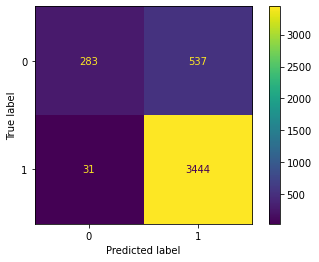

In [89]:
print("RF MODEL")
eval(rf_tfidf, X_test_tf_idf)

In [90]:
cv_on_models(rf_tfidf, X_train_tf_idf, 'RandomForest_tf_idf')

 accuracy score for RandomForest_tf_idf : 0.8632975863497464

 precision-0 score for RandomForest_tf_idf : 0.8840636085887684

 recall-0 score for RandomForest_tf_idf : 0.3276410408480984

 f1-0 score for RandomForest_tf_idf : 0.4775181059022874

 precision-1 score for RandomForest_tf_idf : 0.8617923914115796

 recall-1 score for RandomForest_tf_idf : 0.9897809614079793

 f1-1 score for RandomForest_tf_idf : 0.9213550418579646

                         model  accuracy  precision-0  recall-0      f1-0  \
0        LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1        LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2           LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3  LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   
4          NaiveBayes_CountVec  0.891243     0.698401  0.759528  0.727379   
5            NaiveBayes_tf_idf  0.891243     0.698401  0.759528  0.727379   
6                   SVM_Count

## Ada  Boosting - Vec

In [91]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       820
           1       0.92      0.95      0.94      3475

    accuracy                           0.89      4295
   macro avg       0.84      0.80      0.82      4295
weighted avg       0.89      0.89      0.89      4295



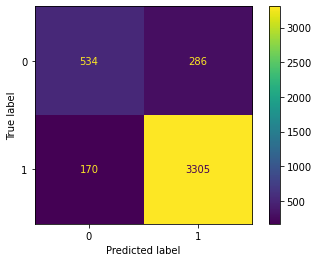

In [92]:
print("Ada MODEL")
eval(ada, X_test_count)

In [93]:
cv_on_models(ada, X_train_count, 'AdaBoost_CountV')

 accuracy score for AdaBoost_CountV : 0.891826072629861

 precision-0 score for AdaBoost_CountV : 0.7603447320254355

 recall-0 score for AdaBoost_CountV : 0.6348682259618947

 f1-0 score for AdaBoost_CountV : 0.6913216993844266

 precision-1 score for AdaBoost_CountV : 0.917055366979306

 recall-1 score for AdaBoost_CountV : 0.952500841659286

 f1-1 score for AdaBoost_CountV : 0.93440929764

                          model  accuracy  precision-0  recall-0      f1-0  \
0         LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1         LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2            LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3   LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   
4           NaiveBayes_CountVec  0.891243     0.698401  0.759528  0.727379   
5             NaiveBayes_tf_idf  0.891243     0.698401  0.759528  0.727379   
6                    SVM_CountV  0.892583     0.744318  0.

## Ada  Boosting - Tf-idf

In [94]:
ada_tfidf = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada_tfidf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

Ada MODEL
              precision    recall  f1-score   support

           0       0.73      0.64      0.69       820
           1       0.92      0.95      0.93      3475

    accuracy                           0.89      4295
   macro avg       0.83      0.79      0.81      4295
weighted avg       0.88      0.89      0.88      4295



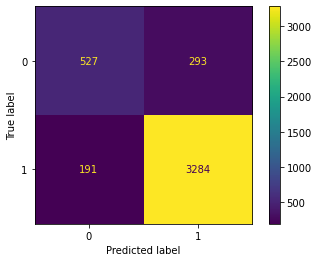

In [95]:
print("Ada MODEL")
eval(ada_tfidf, X_test_tf_idf)

In [96]:
cv_on_models(ada_tfidf, X_train_tf_idf, 'AdaBoost_tf_idf')

 accuracy score for AdaBoost_tf_idf : 0.886411547064451

 precision-0 score for AdaBoost_tf_idf : 0.732864554355791

 recall-0 score for AdaBoost_tf_idf : 0.6388316405960414

 f1-0 score for AdaBoost_tf_idf : 0.6822497129379743

 precision-1 score for AdaBoost_tf_idf : 0.9172520352671306

 recall-1 score for AdaBoost_tf_idf : 0.9448722490689953

 f1-1 score for AdaBoost_tf_idf : 0.9308366250112693

                          model  accuracy  precision-0  recall-0      f1-0  \
0         LogisticReg_countVect  0.897008     0.765782  0.665340  0.711515   
1         LogisticReg_countVect  0.882801     0.659895  0.798533  0.722409   
2            LogisticReg_tf_idf  0.899046     0.838180  0.584875  0.688440   
3   LogisticReg_tf_idf_balanced  0.881927     0.643132  0.859798  0.735683   
4           NaiveBayes_CountVec  0.891243     0.698401  0.759528  0.727379   
5             NaiveBayes_tf_idf  0.891243     0.698401  0.759528  0.727379   
6                    SVM_CountV  0.892583     0.7443

In [98]:
score_df

,model,accuracy,precision-0,recall-0,f1-0,precision-1,recall-1,f1-1
0,LogisticReg_countVect,0.897008,0.765782,0.665340,0.711515,0.923382,0.951709,0.937304
1,LogisticReg_countVect,0.882801,0.659895,0.798533,0.722409,0.949982,0.902698,0.925711
2,LogisticReg_tf_idf,0.899046,0.838180,0.584875,0.688440,0.908545,0.973228,0.939756
3,LogisticReg_tf_idf_balanced,0.881927,0.643132,0.859798,0.735683,0.964047,0.887153,0.923977
4,NaiveBayes_CountVec,0.891243,0.698401,0.759528,0.727379,0.942044,0.922346,0.932063
5,NaiveBayes_tf_idf,0.891243,0.698401,0.759528,0.727379,0.942044,0.922346,0.932063
6,SVM_CountV,0.892583,0.744318,0.667169,0.703208,0.923344,0.945808,0.934416
7,SVM_tf_idf,0.899919,0.775348,0.671433,0.719089,0.924848,0.953869,0.939102
8,RandomForest_CountVec,0.866500,0.876026,0.351415,0.500720,0.865845,0.988126,0.922939
9,RandomForest_tf_idf,0.863298,0.884064,0.327641,0.477518,0.861792,0.989781,0.921355


### Compare Models Accuracies and F1 Scores

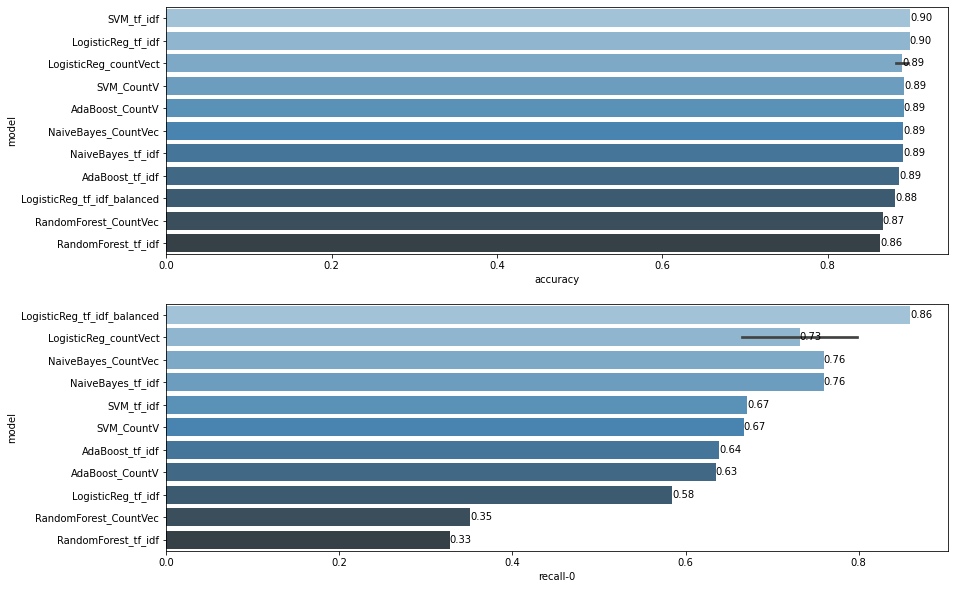

In [99]:
def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.2f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
plt.figure(figsize=(14,10))
plt.subplot(211)
score_df = score_df.sort_values(by="accuracy", ascending=False)
ax=sns.barplot(x="accuracy", y="model", data=score_df, palette="Blues_d")
labels(ax)
plt.subplot(212)
score_df = score_df.sort_values(by="recall-0", ascending=False)
ax=sns.barplot(x="recall-0", y="model", data=score_df, palette="Blues_d")
labels(ax)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


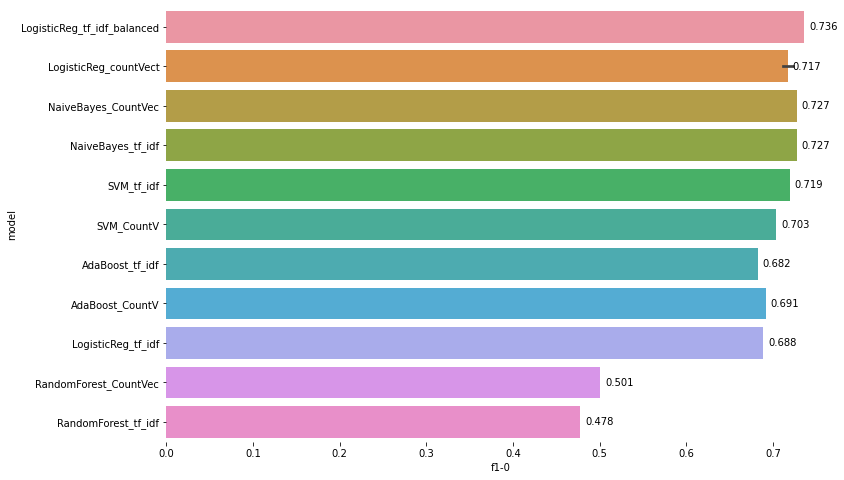

In [100]:
fig = plt.subplots(figsize=(12,8))
ax = sns.barplot( score_df["f1-0"], score_df["model"])
sns.despine(bottom = True, left = True)
for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

### Conclusion

This project was aimed to used sentiment analysis to determined product recommendation. We started with the data engineering and text mining, which cover change text into tokens, remove punctuation, numbers, stop words and normalization them by using lemmatization. Following we used bag of words model to convert the text into numerical feature vectors. Finally we started training 5 different Classification models and we got the best accuracies of 0.90 for Logistic Regression and SVM with (tfidf vectorizer) method best f1-0 score  of 0.736 for Logistic Regression (tfidf vectorizer).  

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___